# Analysis of Breast Cancer Wisconsin Data Set and Fitting an Appropriate Machine Learning Model 

## Problem statement
Our aim is to diagnose patients with breast cancer by analyzing the data of patients and classifying them into two categories:
1. Benign (**B**)
2. Malignant (**M**)

## Libraries used

1. numpy: Fundamental package for scientific computing with python
2. pandas: An open source, BSD-licensed library providing high performance, easy to use data structures and data analysis tools
3. matplotlib: Provides a simple and user friendly plotting framework
4. sklearn: Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

## Data Extraction and Cleaning
In this section, we will load the data from appropriate sources, check for cleanliness and trim and clean the dataset for analysis.

### Details of Data
The data was collected from kaggle: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2

It has 569 rows and 33 columns

In [2]:
#reading the data from file data.csv and storing in dataframe df
df=pd.read_csv("C:\\Users\\Abhishek\\Downloads\\data.csv")
df.shape

(569, 33)

In [3]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Attributes
1. idID - number
2. diagnosis - The diagnosis of breast tissues (M = malignant, B = benign)
3. radius_mean - mean of distances from center to points on the perimeter
4. texture_mean - standard deviation of gray-scale values
5. perimeter_mean - mean size of the core tumor
6. area_mean
7. smoothness_mean - mean of local variation in radius lengths
8. compactness_mean - mean of perimeter^2 / area - 1.0
9. concavity_mean - mean of severity of concave portions of the contour
10. concave points_mean - mean for number of concave portions of the contour
11. symmetry_mean
12. fractal_dimension_mean - mean for "coastline approximation" - 1
13. radius_se - standard error for the mean of distances from center to points on the perimeter
14. texture_se - standard error for standard deviation of gray-scale values
15. perimeter_se
16. area_se
17. smoothness_se - standard error for local variation in radius lengths
18. compactness_se - standard error for perimeter^2 / area - 1.0
19. concavity_se - standard error for severity of concave portions of the contour
20. concave points_se - standard error for number of concave portions of the contour
21. symmetry_se
22. fractal_dimension_se - standard error for "coastline approximation" - 1
23. radius_worst - "worst" or largest mean value for mean of distances from center to points on the perimeter
24. texture_worst - "worst" or largest mean value for standard deviation of gray-scale values
25. perimeter_worst
26. area_worst
27. smoothness_worst - "worst" or largest mean value for local variation in radius lengths
28. compactness_worst - "worst" or largest mean value for perimeter^2 / area - 1.0
29. concavity_worst - "worst" or largest mean value for severity of concave portions of the contour
30. concave points_worst - "worst" or largest mean value for number of concave portions of the contour
31. symmetry_worst
32. fractal_dimension_worst - "worst" or largest mean value for "coastline approximation" - 1

In [4]:
#Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Missing attribute values:
The 33rd column has an unnamed attribute which has 569 null values

In [5]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

We therefore take the decision to drop the 33rd column 'Unnamed' from the dataset. 

In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

## Exploratory Data Analysis and Data Visualisation
In this section, we compute the statistics and create visualizations of various attributes in the dataset. In particular,
we analyse how the target attribute 'diagnosis' depends on the other attributes.

### Statistics of numeric attributes

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### No of Benign and Malignant tumors

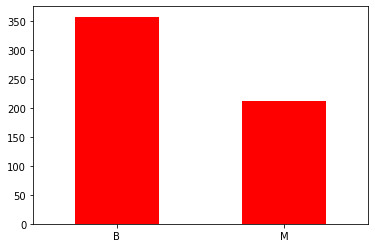

In [8]:
df.diagnosis.value_counts().plot(kind='bar',rot=0,color='r');

### Histograms for data attributes(column index 2 onwards)

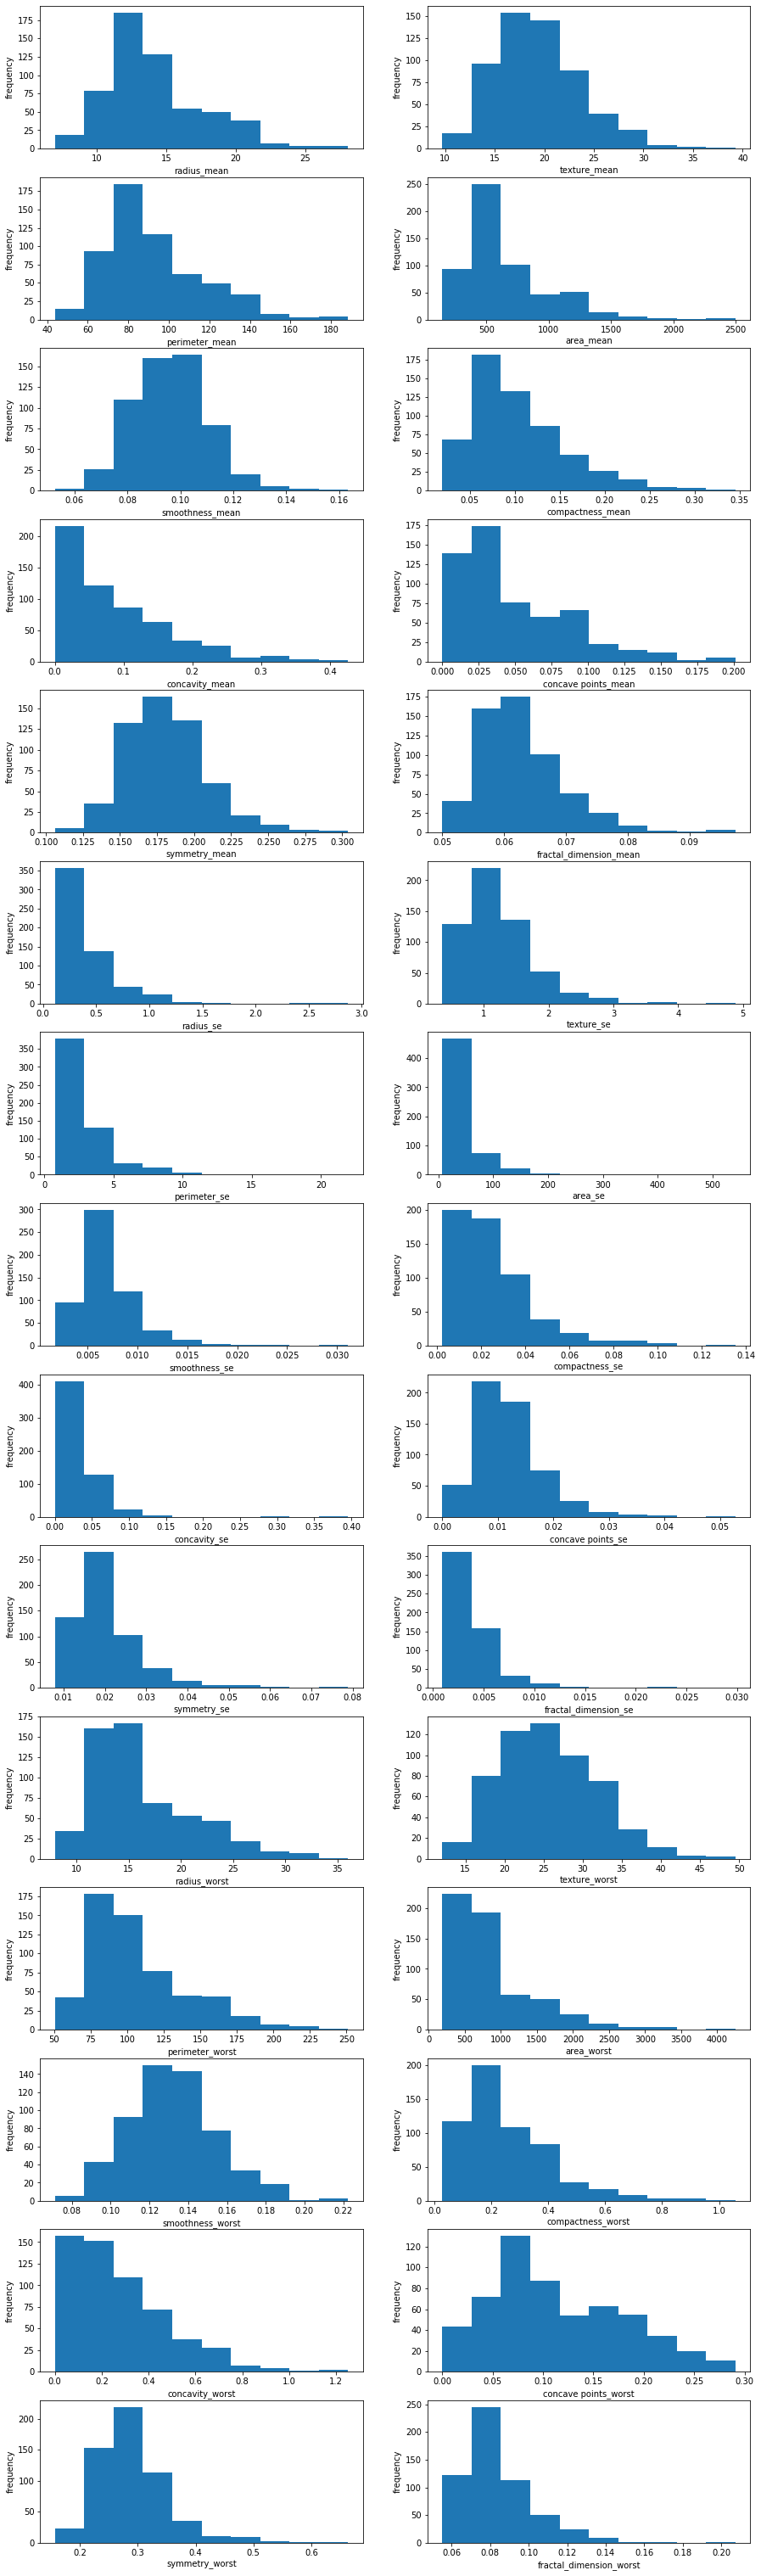

In [9]:
l=df.columns
k=2
fig,ax=plt.subplots(15,2,figsize=(15,55))
for i in range(15):
    for j in range(2):
        ax[i,j].set_xlabel(l[k])
        ax[i,j].set_ylabel('frequency')
        ax[i,j].hist(df[l[k]])
        k+=1
plt.show()

### Boxplots for data attributes (column index 2 onwards)

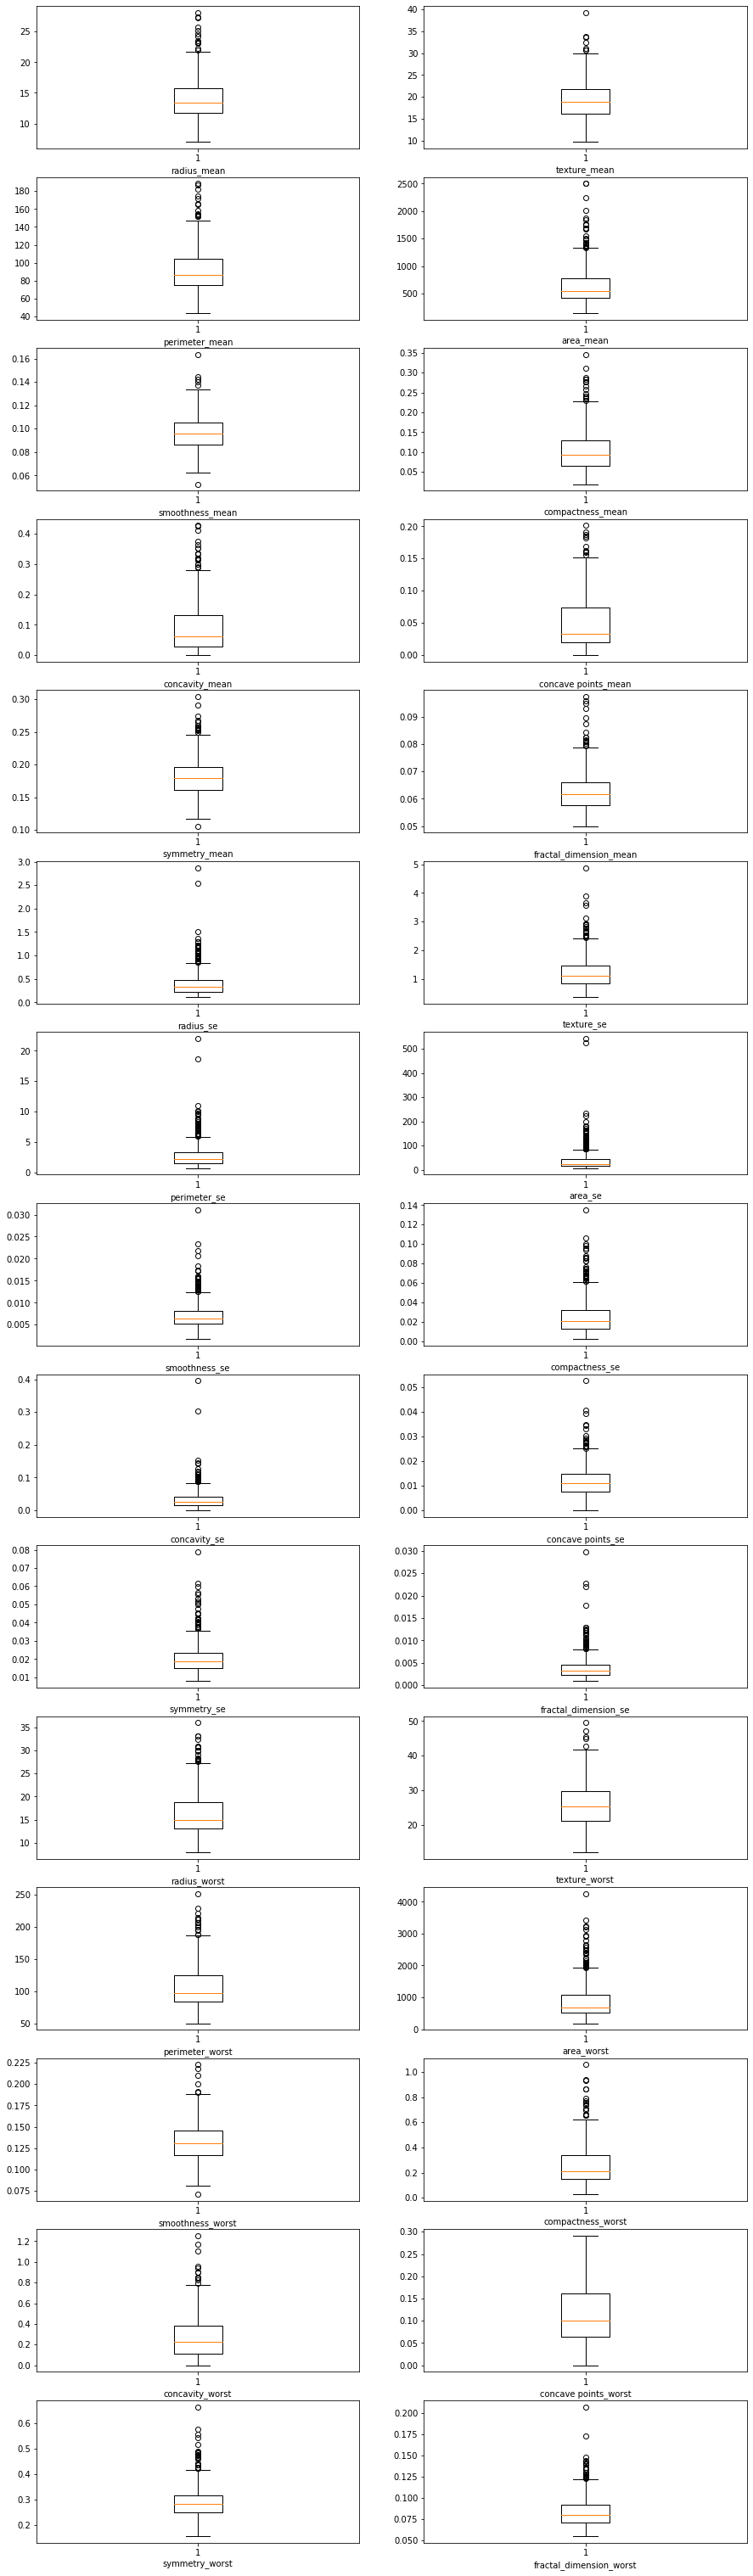

In [10]:
l=df.columns
k=2
fig,ax=plt.subplots(15,2,figsize=(15,55))
for i in range(15):
    for j in range(2):
        ax[i,j].set_xlabel(l[k])
        ax[i,j].boxplot(df[l[k]])
        k+=1
plt.show()

## Fitting Machine Learning Models

The problem of predicting benign or malignant tumor based on features of the tumor is a binary classification problem.

Logistic Regression and Linear Support Vector Machine are appropriate linear classifiers that can be used for this problem as the data analysis above shows that the data points can be separated into two groups by a linear decision boundary.

### Extracting features and labels from the dataframe

In [11]:
#Extract data(features) denoted by X and labels denoted by y from dataframe as numpy arrays
X=np.array(df.iloc[:,2:])
y=np.array(df.iloc[:,1])

In [12]:
#Splitting the data into training and testing data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

In [13]:
#Creating the Logistic Regression model
lr=LogisticRegression()

In [14]:
#training the Logistic Regression model and maaking predictions
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
#training accuracy
lr.score(X_train,y_train)

0.9522613065326633

In [16]:
#testing accuracy
lr.score(X_test,y_test)

0.9649122807017544

In [17]:
#saving the model
joblib.dump(lr,"logisticCancer.sav")

['logisticCancer.sav']

### Linear Support Vector Machine(SVM)

In [18]:
#Creating the Linear SVM model
svm=LinearSVC()

In [19]:
#training the Linear SVM model and making predictions
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
#training accuracy
svm.score(X_train,y_train)

0.8668341708542714

In [21]:
#testing accuracy
svm.score(X_test,y_test)

0.8947368421052632

In [22]:
#saving the model
joblib.dump(svm,"svmCancer.sav")

['svmCancer.sav']